In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for plot visualization
sns.set_style("whitegrid")
%matplotlib inline


In [2]:
train = pd.read_csv('train_taxi.csv',nrows=1000000)
test = pd.read_csv('test_taxi.csv')

## PART 1 - DATA CLEANSING AND EXPLORATORY DATA ANALYSIS(EDA)

I intend to perform the following steps:

1) Check the shape of train and test datasets 

2) Check for null values 

3) Check for any outliers 

4) Type conversion of fields if any 

In [3]:
# train shape
train.shape

(1000000, 8)

In [4]:
# test shape
test.shape

(9914, 7)

In [5]:
# lets check few rows of the train dataset
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [6]:
# Important features of train dataset
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [7]:
# Check for missing values in the train set
train.isnull().sum().sort_values(ascending = False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [8]:
# data where the column values are null
train[train.isnull().any(1)] # any(1) returns true if condition is satisfied, in this case null condition. (1) - over the column

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.50,2012-12-11 12:57:00 UTC,-73.992760,40.743098,NaN,NaN,0
245696,2013-03-21 18:07:07.0000001,86.50,2013-03-21 18:07:07 UTC,-73.991572,40.740591,NaN,NaN,0
340533,2012-12-11 12:50:52.00000010,27.50,2012-12-11 12:50:52 UTC,-73.979639,40.784742,NaN,NaN,0
428108,2011-09-08 09:12:52.0000001,11.80,2011-09-08 09:12:52 UTC,-73.987041,40.751542,NaN,NaN,0
471472,2012-12-11 12:34:20.0000006,7.80,2012-12-11 12:34:20 UTC,0.000000,0.000000,NaN,NaN,0
524834,2011-09-25 23:01:12.0000005,14.76,2011-09-25 23:01:12 UTC,-73.985374,40.768518,NaN,NaN,0
574023,2013-11-04 20:59:15.0000001,10.20,2013-11-04 20:59:15 UTC,-73.998460,40.745406,NaN,NaN,0
580338,2012-12-11 12:00:53.0000002,21.00,2012-12-11 12:00:53 UTC,-73.974743,40.752057,NaN,NaN,0
794694,2013-11-04 20:07:59.0000006,7.20,2013-11-04 20:07:59 UTC,-73.977048,40.787565,NaN,NaN,0
895400,2011-06-20 11:34:44.0000001,40.00,2011-06-20 11:34:44 UTC,-73.862900,40.768900,NaN,NaN,0


In [9]:
# Drop the null values
train = train.drop(train[train.isnull().any(1)].index , axis = 0) # drop it by the index

In [10]:
train.shape

(999990, 8)

## Lets work on the target variable = fare_amount

In [11]:
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [12]:
# Clearly the above table suggests some outliers, the min value is negative 44, fare cannot be negative.
# Lets drop such rows

In [13]:
# Rows with negative fare_amount
train[train['fare_amount'] < 0].head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1


In [14]:
# Counting the no. of rows with negative fare amount
from collections import Counter
Counter(train['fare_amount'] < 0)

Counter({False: 999952, True: 38})

In [15]:
# Lets drop these 38 rows
train = train.drop(train[train['fare_amount'] < 0].index, axis = 0)

In [16]:
train.shape

(999952, 8)

In [17]:
# Checking again to confirm that there are no negative fare values in the data
train['fare_amount'].describe()
# min value is now 0, so we have eliminated all the negative values...Awesome!!

count    999952.000000
mean         11.348616
std           9.821249
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [18]:
# I want to check the fare values > 100 dollars, because it seems bit odd
Counter(train['fare_amount'] > 100)

# There are close to 400 such values out of 1 million

Counter({False: 999556, True: 396})

## Let's work on the passenger Count Variable

In [19]:
train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [20]:
# From the above table, the max passenger count = 208, this seems impossible as far as taxi is concerned 
# Even if its a bus, these many passengers are not possible - So this is definitely an outlier
# I believe maximum passenger a SUV taxi can have is 6 ( 3 in middle, 2 at back, 1 at front) - ideal scenario

In [21]:
Counter(train['passenger_count'] > 6)
# just 1 row

Counter({False: 999951, True: 1})

In [22]:
# lets check the row
train[train['passenger_count'] > 6]

# the data below shows that this is an error because, longitude, latitude = 0 and passenger count is 208
# We can get rid of this outlier

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [23]:
# lets drop the row with passenger_count > 6
train = train.drop(train[train['passenger_count'] > 6].any(1).index, axis = 0)

In [24]:
train.shape

(999951, 8)

In [25]:
train['passenger_count'].describe()
# Alright, it looks good now!!

count    999951.000000
mean          1.684736
std           1.307733
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

## Let's work on pickup latitude and longitude now

In [26]:
train[['pickup_latitude','pickup_longitude']].describe()

,pickup_latitude,pickup_longitude
count,999951.000000,999951.000000
mean,39.929090,-72.526792
std,7.626025,12.057574
min,-3116.285383,-3377.680935
25%,40.734965,-73.992060
50%,40.752695,-73.981792
75%,40.767154,-73.967095
max,2621.628430,2522.271325


In [27]:
# From a quick google search i found that the valid latitudes can range from -90 to 90 and valid longitudes can range
# from -180 to 180

# Clearly the above table shows some invalid information if we look up the min and max values

In [28]:
# lets check such data
train[(train['pickup_latitude'] < -90) |  (train['pickup_latitude'] > 90)].head(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1


In [29]:
# lets drop such latitude values
train = train.drop(train[(train['pickup_latitude'] < -90) |  (train['pickup_latitude'] > 90)].index, axis = 0)

In [30]:
train.shape

(999939, 8)

In [31]:
# Do the same for pickup longitude values
train[(train['pickup_longitude'] < -180) |  (train['pickup_longitude'] > 180)].head(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.73823,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.74762,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.76648,-73.987928,40.751742,3


In [32]:
train = train.drop(train[(train['pickup_longitude'] < -180) |  (train['pickup_longitude'] > 180)].index, axis=0)

In [33]:
train.shape

(999928, 8)

## Let's work on the dropoff latitudes and longitudes

In [34]:
# lets follow the same approach as above and drop the values outside the range
train[['dropoff_latitude','dropoff_longitude']].describe()

,dropoff_latitude,dropoff_longitude
count,999928.000000,999928.000000
mean,39.926691,-72.521750
std,7.104385,10.626273
min,-3114.338567,-1329.621332
25%,40.734047,-73.991385
50%,40.753166,-73.980135
75%,40.768129,-73.963654
max,1651.553433,45.581619


In [35]:
# drop the rows
#latitude
train = train.drop(train[(train['dropoff_latitude'] < -90) | (train['dropoff_latitude'] > 90)].index, axis = 0)
#longitude
train = train.drop(train[(train['dropoff_longitude'] < -180) | (train['dropoff_longitude'] > 180)].index, axis = 0)

In [36]:
train.shape
# 17 rows dropped

(999911, 8)

## Convert data types of some columns

In [37]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [38]:
# key and pickup-datetime are object columns, lets convert them to date time

In [39]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [40]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [41]:
train.dtypes # Successfully converted

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

## EDA time

1) I want to find out if the passenger count affects the fare

2) I want to find out if date and time affects the fare

3) I want to find out if the day of the week affects the fare

4) I want to find out if the distance travelled affects the fare

## Lets work on to calculate the distance between pickup and dropff latitudes and longitudes

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [42]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        #R = 6371  #radius of earth in kilometers
        R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in miles
        i['H_Distance'] = d
    return d

In [43]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude').head(5)

0    1.443696
1    1.507137
2    0.384421
3    1.218604
4    3.347720
dtype: float64

In [44]:
# lets check distance in train data
train['H_Distance'].head(5)

0    0.640527
1    5.250993
2    0.863464
3    1.739493
4    1.242295
Name: H_Distance, dtype: float64

In [45]:
# lets check the distance in test data
test['H_Distance'].head(5)

0    1.443696
1    1.507137
2    0.384421
3    1.218604
4    3.347720
Name: H_Distance, dtype: float64

## Let's work on the date time columns that we converted above

Lets split the data time column in the following parts:

-Year

-Month

-Date

-Hour

-Day of the week

In [46]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Hour'] = i['pickup_datetime'].dt.hour
    i['Day_of_week'] = i['pickup_datetime'].dt.dayofweek
    

In [47]:
train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.640527,2009,6,15,17,0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5.250993,2010,1,5,16,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.863464,2011,8,18,0,3
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,1.739493,2012,4,21,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.242295,2010,3,9,7,1


In [48]:
test.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,1.443696,2015,1,27,13,1
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,1.507137,2015,1,27,13,1


** Does the no. of passengers affects the fare**

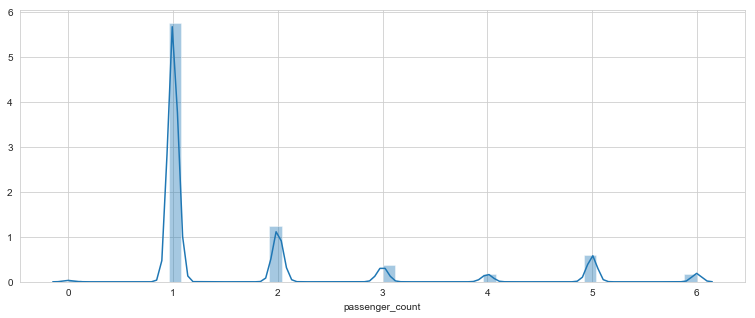

In [49]:
# First lets see the distribution of passengers
f, ax1 = plt.subplots(figsize=(13,5))
ax = sns.distplot(train['passenger_count'],ax=ax1)
# The line on the graph represents KDE - kernel density estimation. It is the density of the particular point over the data

In [50]:
# Clearly the distribution plot say that passenger= 1 has the highest frequency, followed by 2 and 5

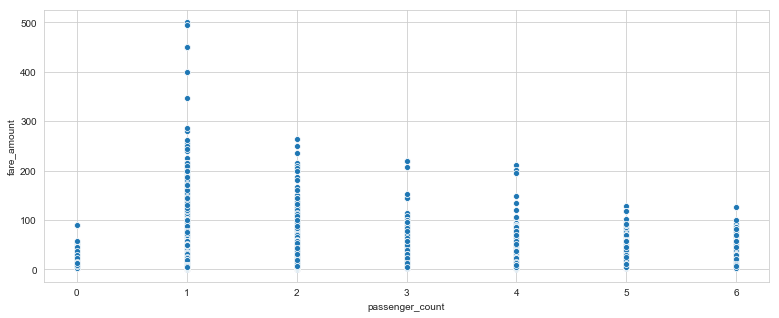

In [51]:
f, ax1 = plt.subplots(figsize=(13,5))
ax = sns.scatterplot(x='passenger_count', y='fare_amount', data = train,ax=ax1)

In [52]:
# Therefore its clear that single passengers are most frequent travellers and also contribute to most of the fare amount

** Lets see if date and time affects the fare**

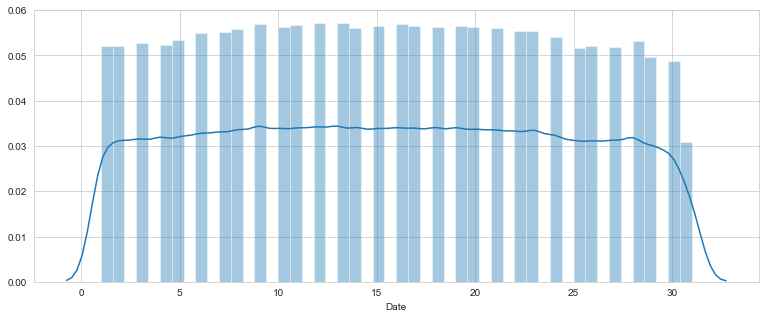

In [53]:
f, ax1 = plt.subplots(figsize=(13,5))
sns.distplot(train['Date'], ax=ax1)

In [54]:
# More travels between 9th - 24th of the month and less people travel during the first and last week of the month

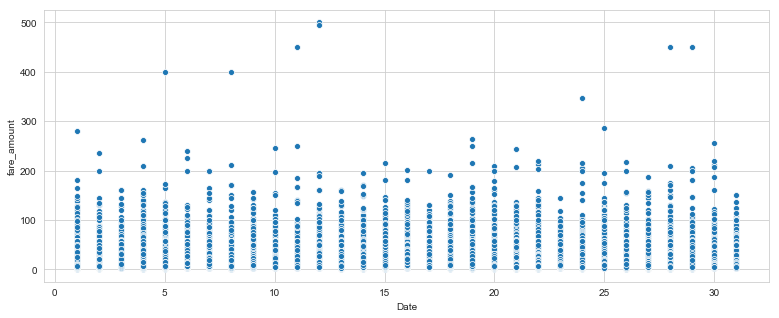

In [55]:
f, ax1 = plt.subplots(figsize=(13,5))
sns.scatterplot(x='Date', y='fare_amount', data=train, ax=ax1)

In [56]:
# fares are almost same throught the month with highest fare touched on 12th

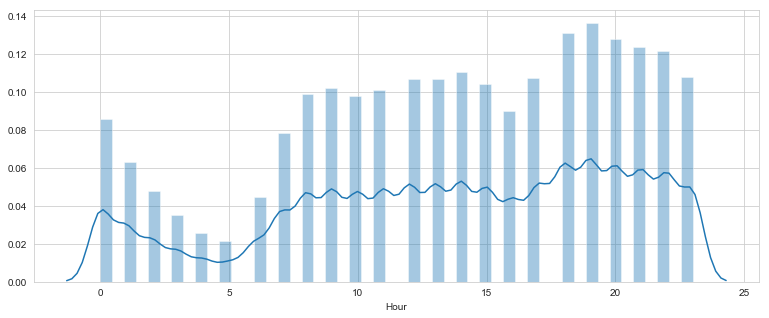

In [57]:
f, ax1 = plt.subplots(figsize=(13,5))
sns.distplot(train['Hour'], ax=ax1)

In [58]:
#Clearly there are lot of spikes after 6 pm till 12 am with 7 pm being the most rush hour
# Taxi clearly is not taken by lot of people at 5 am

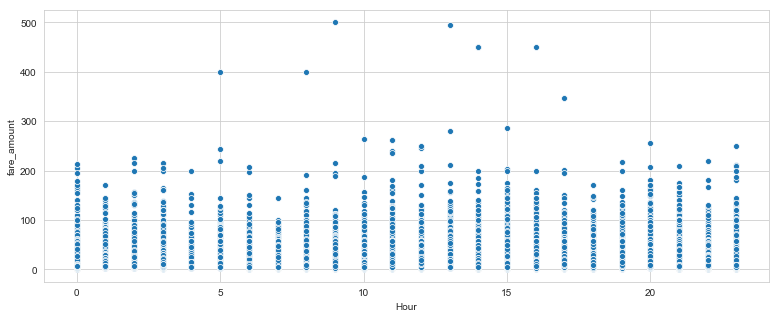

In [59]:
f, ax1 = plt.subplots(figsize=(13,5))
sns.scatterplot(x='Hour', y='fare_amount', data=train, ax=ax1)

In [60]:
# This is almost the same, every hour is more or equal to the generation of fare amount 
# But fares are high between 5am - 10am & 1pm - 4pm - maybe these people lives far away and they travel more distance and
# travel at these times to avoid traffic


** Lets see if the day of the week affects the fare**

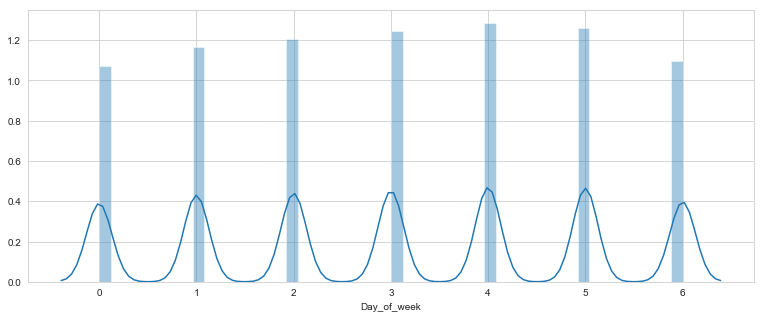

In [61]:
f, ax1 = plt.subplots(figsize=(13,5))
sns.distplot(train['Day_of_week'], ax=ax1)

In [62]:
# There is not much difference between rides taken and on the day they are taken
# but thursday and friday are the days where most rides are taken with least on saturday and sunday

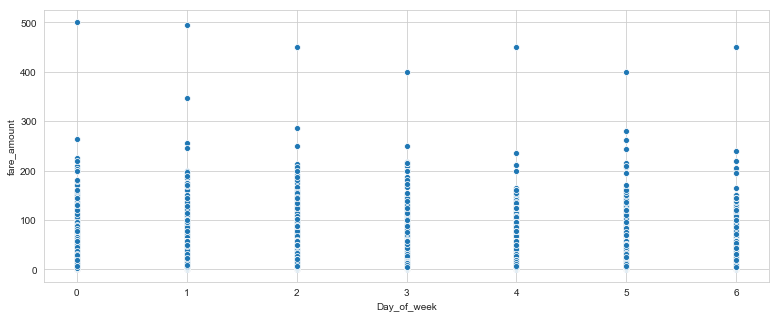

In [63]:
f, ax1 = plt.subplots(figsize=(13,5))
sns.scatterplot(x='Day_of_week', y='fare_amount', data=train, ax=ax1)

In [64]:
# moreover the same, but we have high fares on saturday, sunday and monday - may be people travel long distances to meet their
# family maybe

**Lets see if distance affects the fare**

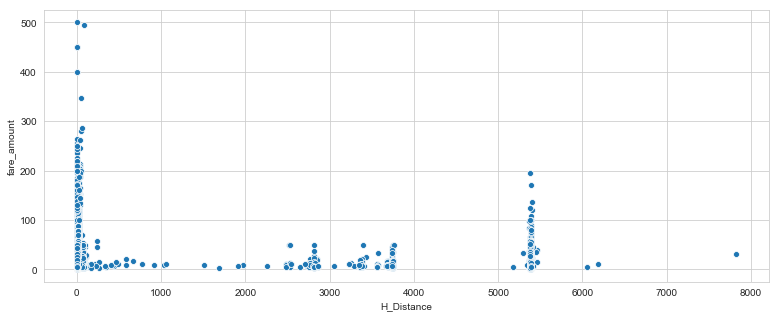

In [65]:
# Lets just check the range of distance by just simply plotting it against fare

f, ax1 = plt.subplots(figsize=(13,5))
sns.scatterplot(x='H_Distance', y='fare_amount', data=train, ax=ax1)

In [66]:
# There are lot of rides above say 100 miles parameter - they certainly dont seem of the new york area

In [67]:
# lets divide the distance into various bins, so that we can get a clear picture

In [68]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10), ['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50), ['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100), ['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200), ['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300), ['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300) , ['H_Distance']]

# Making column 'bins' to recognize the category of bins
bins_0['bins'] = 0
bins_1['bins'] = 0.10
bins_2['bins'] = 11.50
bins_3['bins'] = 51.100
bins_4['bins'] = 100.200
bins_5['bins'] = 201.300
bins_6['bins'] = 300.1000

dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])

In [69]:
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [70]:
dist_bins.head(2)

,H_Distance,bins
11,0.0,0.0
15,0.0,0.0


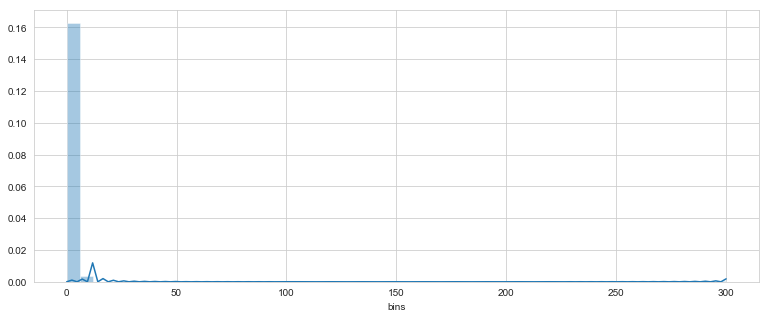

In [71]:
f, ax1 = plt.subplots(figsize=(13,5))
sns.distplot(dist_bins['bins'], ax=ax1)

In [72]:
Counter(dist_bins['bins'])

Counter({0.0: 28481,
         0.1: 948819,
         11.5: 20357,
         51.1: 310,
         100.2: 16,
         201.3: 6,
         300.1: 1922})

In [73]:
# There are close to 30k observations for distance = 0 miles - hard to understand, may be driver waited and the 
# the passenger did not come - just a guess - i will have to look more into it
# Also, there are close to 2000 observations above 300 miles - seems incorrect considering this is new york city data

In [74]:
# lets have a look at the observations where distance > 300 miles

In [75]:
train[train['H_Distance'] >= 300]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,5385.945749,2009,2,22,22,6
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,5384.680323,2011,3,10,20,3
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,3744.920829,2011,8,29,8,0
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,5386.038620,2012,6,24,17,6
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,5384.652471,2015,4,7,23,1
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,5385.486566,2010,3,30,7,1
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3368.654102,2012,3,4,1,6
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,5384.011003,2014,7,28,15,0
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,5383.294912,2015,2,27,16,4
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,2763.461974,2011,6,18,4,5


Remove fields of the following -

Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0

vice versa of point 1.

Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [76]:
train[(train['pickup_latitude'] == 0) & (train['pickup_longitude'] == 0) & (train['dropoff_longitude'] !=0) & 
(train['dropoff_latitude'] !=0) & (train['fare_amount'] == 0)]

# Just 1 observation..Great

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
897211,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,5382.860703,2015,4,8,0,2


In [77]:
# lets drop such observation
train = train.drop(train[(train['pickup_latitude'] == 0) & (train['pickup_longitude'] == 0) & (train['dropoff_longitude'] !=0) & 
(train['dropoff_latitude'] !=0) & (train['fare_amount'] == 0)].index, axis=0)

In [78]:
train.shape

(999910, 14)

In [79]:
# check tha same for test data
test[(test['pickup_latitude'] == 0) & (test['pickup_longitude'] == 0) & (test['dropoff_longitude'] !=0) & 
(test['dropoff_latitude'] !=0)]

# No records

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week


In [80]:
# Check the vice versa condition
train[(train['pickup_latitude'] !=0) & (train['pickup_longitude'] !=0) & (train['dropoff_longitude'] ==0) & 
(train['dropoff_latitude'] ==0) & (train['fare_amount'] == 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
930680,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02,-73.982101,40.770557,0.0,0.0,2,5385.303216,2015,3,21,21,5
942215,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37,-73.952240,40.749435,0.0,0.0,1,5383.497998,2015,3,22,0,6
949564,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39,-73.996246,40.748653,0.0,0.0,1,5385.752175,2015,4,28,11,1


In [81]:
train = train.drop(train[(train['pickup_latitude'] !=0) & (train['pickup_longitude'] !=0) & (train['dropoff_longitude'] ==0) & 
(train['dropoff_latitude'] ==0) & (train['fare_amount'] == 0)].index, axis =0)

In [82]:
train.shape

(999907, 14)

In [83]:
# Check same for test data
test[(test['pickup_latitude'] !=0) & (test['pickup_longitude'] !=0) & (test['dropoff_longitude'] ==0) & 
(test['dropoff_latitude'] ==0)]

# No records

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week


In [84]:
# lets check the distance > 200 data, because there is no way people will be travelling this distance in cabs

high_distance = train[(train['H_Distance'] >= 200) & (train['H_Distance'] != 0)]
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,5385.945749,2009,2,22,22,6
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,5384.680323,2011,3,10,20,3
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,3744.920829,2011,8,29,8,0
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,5386.038620,2012,6,24,17,6
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,5384.652471,2015,4,7,23,1
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,5385.486566,2010,3,30,7,1
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3368.654102,2012,3,4,1,6
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,5384.011003,2014,7,28,15,0
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,5383.294912,2015,2,27,16,4
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,2763.461974,2011,6,18,4,5


1924 rows! As you can see from the DF above, the abnormally high distances are due to either the pickup or 
dropoff co-ordinates being incorrect or 0. 
However, since all these values have fares, I do not wish to drop them as they contain crucial data. 
Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula

distance = (fare_amount - 2.5)/1.56

In [85]:
high_distance.shape

(1924, 14)

In [86]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1)

C:\Users\Manish Dalal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
#The distance values have been replaced by the newly calculated ones according to the fare
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,22,6
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,20,3
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,8,0
2397,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,17,6
4278,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,23,1
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,7,1
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,1,6
6188,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,15,0
6302,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,16,4
7014,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,4,5


In [88]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)

In [89]:
train.shape


(999907, 14)

Now we shall check for rows where the distance values are 0

In [90]:
train[train['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,11.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,12.0,5.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,20.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,0.0,2.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,17.0,3.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,21.0,2.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,17.0,6.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,1.0,6.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,1.0,5.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,18.0,4.0


We can see a few rows with distance =0. This could be due to 2 reasons

The cab waited the whole time and the passenger eventually cancelled. That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.
The pickup and drop co-ordinates were not entered. In other words, these are missing values!
28667 rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices -

$$2.5 base-price + $1.56/km --> 6AM to 8PM Mon-Fri

$$3.0 base-price + $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

**SCENARIO 1**

Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [91]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
105051,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,21.0,2.0
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,6.0,0.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,22.0,2.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,23.0,2.0


There are 4 rows. There 4 rows do not help us in anyway as we do not know either the distance or the fare to impute the missing values. So we shall drop them

In [92]:
train = train.drop(train[(train['H_Distance']==0) & (train['fare_amount']==0)].index, axis = 0)

In [93]:
#4 rows dropped
train[(train['H_Distance']==0)].shape

(28663, 14)

Fare is not 0 and is less than the base amount, but Distance is 0.

Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [96]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train[((train['Hour']>=6) & (train['Hour']<=20)) & ((train['Day_of_week']>=1) & (train['Day_of_week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5)]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
830616,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,6.0,2.0
925892,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,1.0,21.0,14.0,2.0


In [97]:
train=train.drop(rush_hour.index, axis=0)

In [98]:
train.shape

(999901, 14)

In [99]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train[((train['Hour']<6)|(train['Hour']>20)) & ((train['Day_of_week']>=1)&(train['Day_of_week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]

non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,5.0,3.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,22.0,4.0
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,3.0,4.0
16074,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,0.0,2013.0,5.0,30.0,0.0,3.0
17862,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,8.0,21.0,23.0,3.0
18037,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,0.0,2009.0,1.0,7.0,22.0,2.0
24835,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,0.0,2015.0,2.0,27.0,2.0,4.0
29613,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,0.0,2009.0,6.0,17.0,3.0,2.0


In [100]:
#Saturday and Sunday all hours
weekends = train[((train['Day_of_week']==0) | (train['Day_of_week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends
#Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,22.0,6.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,0.0,6.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,15.0,0.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,16.0,0.0
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,13.0,6.0
6297,2010-11-15 09:29:00.000000191,2.5,2010-11-15 09:29:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,11.0,15.0,9.0,0.0
9177,2010-12-06 11:48:34.000000500,2.5,2010-12-06 11:48:34,-73.946993,40.744583,-73.946993,40.744583,3.0,0.0,2010.0,12.0,6.0,11.0,0.0
9621,2015-03-01 22:39:54.000000100,2.5,2015-03-01 22:39:54,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,3.0,1.0,22.0,6.0
11593,2010-10-17 04:28:00.000000150,2.9,2010-10-17 04:28:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,2010.0,10.0,17.0,4.0,6.0
13571,2009-03-09 12:26:25.000000100,2.5,2009-03-09 12:26:25,-73.416169,40.784140,-73.416169,40.784140,1.0,0.0,2009.0,3.0,9.0,12.0,0.0


From scenario 2, I can understand that the distance is 0, but the fare is all the minimum fare of $2.5. This could be because the passenger booked the cab but ended up cancelling to pay the base fare

**SCENARIO 3**

Fare is 0, but Distance is not 0. These values need to be imputed.

I can calculate the fare as I have the distance. I shall use the following formula

fare = 2.5 + 1.56(H_Distance)

In [101]:
train[(train['H_Distance']!=0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,1.979042,2010.0,2.0,15.0,14.0,0.0
27891,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1.0,0.000661,2015.0,5.0,15.0,21.0,4.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.011447,2010.0,3.0,18.0,19.0,3.0
175352,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2.0,0.005744,2014.0,6.0,29.0,16.0,6.0
211455,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1.0,0.003594,2015.0,4.0,15.0,14.0,2.0
211499,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000334,2010.0,3.0,8.0,18.0,0.0
266485,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1.0,0.002179,2010.0,2.0,20.0,9.0,5.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.327091,2015.0,5.0,8.0,7.0,4.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,1.863999,2015.0,1.0,13.0,0.0,1.0
489767,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2.0,0.000478,2015.0,2.0,14.0,21.0,5.0


In [102]:
scenario_3 = train[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [103]:
len(scenario_3)

21

In [104]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
788466,2010-02-26 22:10:53.000000200,0.0,2010-02-26 22:10:53,-73.812794,40.695922,-73.993577,40.749743,1.0,10.171355,2010.0,2.0,26.0,22.0,4.0
762802,2015-02-04 23:47:28.000000600,0.0,2015-02-04 23:47:28,-73.864532,40.770012,-74.030937,40.727139,1.0,9.200760,2015.0,2.0,4.0,23.0,2.0
561786,2013-08-26 00:22:00.000000580,0.0,2013-08-26 00:22:00,-73.988468,40.722775,-73.923687,40.807775,1.0,6.781543,2013.0,8.0,26.0,0.0,0.0
10002,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,1.979042,2010.0,2.0,15.0,14.0,0.0
431819,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,1.863999,2015.0,1.0,13.0,0.0,1.0
895361,2010-02-08 23:39:17.000000200,0.0,2010-02-08 23:39:17,-73.880422,40.741431,-73.873903,40.742301,1.0,0.346539,2010.0,2.0,8.0,23.0,0.0
386734,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.327091,2015.0,5.0,8.0,7.0,4.0
520715,2015-03-28 18:14:09.000000110,0.0,2015-03-28 18:14:09,-73.987694,40.764881,-73.990150,40.761581,4.0,0.261755,2015.0,3.0,28.0,18.0,5.0
760662,2015-05-24 03:16:52.000000200,0.0,2015-05-24 03:16:52,-74.001633,40.730762,-73.999748,40.733494,1.0,0.212965,2015.0,5.0,24.0,3.0,6.0
47302,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.011447,2010.0,3.0,18.0,19.0,3.0


In [105]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

C:\Users\Manish Dalal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
scenario_3['fare_amount']

10002      5.587305
27891      2.501031
47302      2.517857
175352     2.508961
211455     2.505606
211499     2.500521
266485     2.503399
386734     3.010262
431819     5.407838
489767     2.500746
495273     2.500411
520715     2.908337
561786    13.079206
670254     2.500411
681342     2.500980
760662     2.832225
762802    16.853185
788466    18.367314
895361     3.040600
938020     2.500747
957590     2.503422
Name: fare_amount, dtype: float64

In [107]:
train.update(scenario_3)

In [108]:
train.shape

(999901, 14)

**SCENARIO 4**

Fare is not 0, but Distance is 0. These values need to be imputed.

In [109]:
train[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,11.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,12.0,5.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,20.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,0.0,2.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,17.0,3.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,21.0,2.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,17.0,6.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,1.0,6.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,1.0,5.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,18.0,4.0


In [110]:
scenario_4 = train[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [111]:
len(scenario_4)

28661

In [112]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,5.0,3.0
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,22.0,6.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
799,2013-12-08 23:39:00.000000800,3.0,2013-12-08 23:39:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2013.0,12.0,8.0,23.0,6.0
958,2011-02-22 14:09:00.000000660,2.5,2011-02-22 14:09:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2011.0,2.0,22.0,14.0,1.0
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,0.0,6.0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,15.0,0.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,22.0,4.0
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,16.0,0.0


In [113]:
scenario_4[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,11.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,12.0,5.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,20.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,0.0,2.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,17.0,3.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,21.0,2.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,17.0,6.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,1.0,6.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,1.0,5.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,18.0,4.0


These 27159 rows need to be imputed using the following formula -

distance = (fare_amount - 2.5)/1.56

In [114]:
scenario_4_sub = scenario_4[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [115]:
len(scenario_4_sub)

27159

In [116]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

C:\Users\Manish Dalal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
train.update(scenario_4_sub)

In [118]:
train.shape

(999901, 14)

In [119]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Hour,Day_of_week
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2.134772,2011.815816,6.857979,16.194170,13.467420,2.852834
std,0.042774,0.033541,0.039072,0.035435,1.278747,2.468471,1.803347,3.353272,8.838482,6.868584,1.994451
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,0.806762,2010.000000,4.000000,9.000000,8.000000,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,1.377921,2012.000000,7.000000,16.000000,15.000000,3.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2.513789,2014.000000,10.000000,25.000000,19.000000,5.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,62.138491,2015.000000,12.000000,31.000000,23.000000,6.000000


**PART 2 --> MODELLING AND PREDICTION**

FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [120]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Hour',
       'Day_of_week'],
      dtype='object')

In [121]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Hour', 'Day_of_week'],
      dtype='object')

In [122]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [123]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Hour', 'Day_of_week'],
      dtype='object')

In [124]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Hour', 'Day_of_week'],
      dtype='object')

In [125]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test

In [126]:
x_train.shape

(999901, 11)

In [127]:
x_train.columns


Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month',
       'Date', 'Hour', 'Day_of_week'],
      dtype='object')

In [128]:
x_test.shape

(9914, 11)

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)


C:\Users\Manish Dalal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [131]:
rf_predict

array([ 9.75 , 10.1  ,  4.58 , ..., 54.153, 20.3  ,  8.25 ])

In [133]:
submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('submission_taxi_fare_pred.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.750
1,2015-01-27 13:08:24.0000003,10.100
2,2011-10-08 11:53:44.0000002,4.580
3,2012-12-01 21:12:12.0000002,7.850
4,2012-12-01 21:12:12.0000003,15.550
5,2012-12-01 21:12:12.0000005,11.780
6,2011-10-06 12:10:20.0000001,5.660
7,2011-10-06 12:10:20.0000003,48.840
8,2011-10-06 12:10:20.0000002,14.197
9,2014-02-18 15:22:20.0000002,6.250


**BOOSTING USING LGBM**

In [134]:
import lightgbm as lgbm

In [135]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [136]:
pred_test_y = np.zeros(x_test.shape[0])
pred_test_y.shape

(9914,)

In [137]:
train_set = lgbm.Dataset(x_train, y_train, silent=True)
train_set

In [138]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [139]:
print(model)

In [140]:
pred_test_y = model.predict(x_test, num_iteration = model.best_iteration)

In [141]:
print(pred_test_y)

[10.48433252 10.60926116  4.67040351 ... 53.98691845 21.71824559
  6.95067449]


In [142]:
submission['fare_amount'] = pred_test_y
submission.to_csv('submission_taxi_fare_LGB.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.484333
1,2015-01-27 13:08:24.0000003,10.609261
2,2011-10-08 11:53:44.0000002,4.670404
3,2012-12-01 21:12:12.0000002,8.467402
4,2012-12-01 21:12:12.0000003,14.850716
5,2012-12-01 21:12:12.0000005,11.040371
6,2011-10-06 12:10:20.0000001,5.265235
7,2011-10-06 12:10:20.0000003,48.796356
8,2011-10-06 12:10:20.0000002,11.918169
9,2014-02-18 15:22:20.0000002,6.964715
